In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Configuração para reprodutibilidade
np.random.seed(42)

In [7]:

# Gerando dias do mês (1 a 30)
dias = np.arange(1, 31)

# Gerando Vendas Normais (Média de 500, variando +/- 50)
vendas = np.random.normal(500, 50, 30).round(2)

# Inserindo um valor fora da curva (Outlier)
vendas[14] = 3500.00  # dia 15 

# Criando o DataFrame
df_vendas = pd.DataFrame({
    'Dia': dias,
    'Vendas': vendas
})
df_vendas.iloc[12:17]

,Dia,Vendas
12,13,512.10
13,14,404.34
14,15,3500.00
15,16,471.89
16,17,449.36


In [8]:
# Revisão pandas
resumo = df_vendas['Vendas'].describe()

media = df_vendas['Vendas'].mean()
mediana = df_vendas['Vendas'].median()
desvio = df_vendas['Vendas'].std()

print(f"Venda Média: R$ {media:.2f}")
print(f"Venda Mediana: R$ {mediana:.2f}") # Metas poderiam ser melhor baseadas nesse valor
print(f"Desvio Padrão: R$ {desvio:.2f}")

Venda Média: R$ 593.47
Venda Mediana: R$ 488.50
Desvio Padrão: R$ 550.61


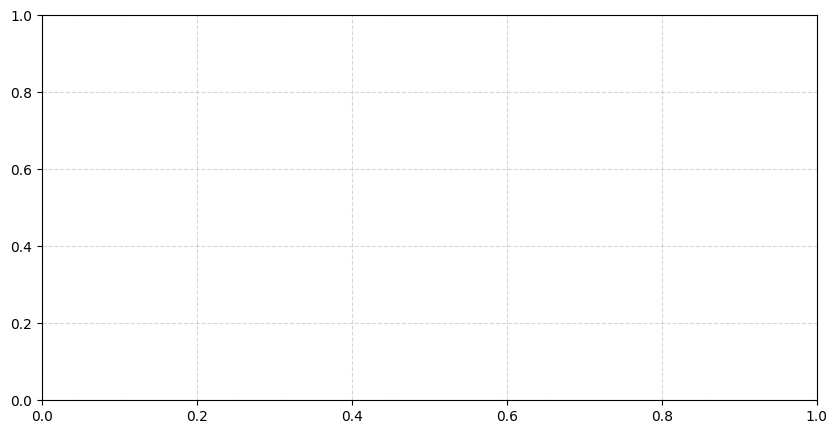

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.grid(True, linestyle='--', alpha=0.5) # Grade suave


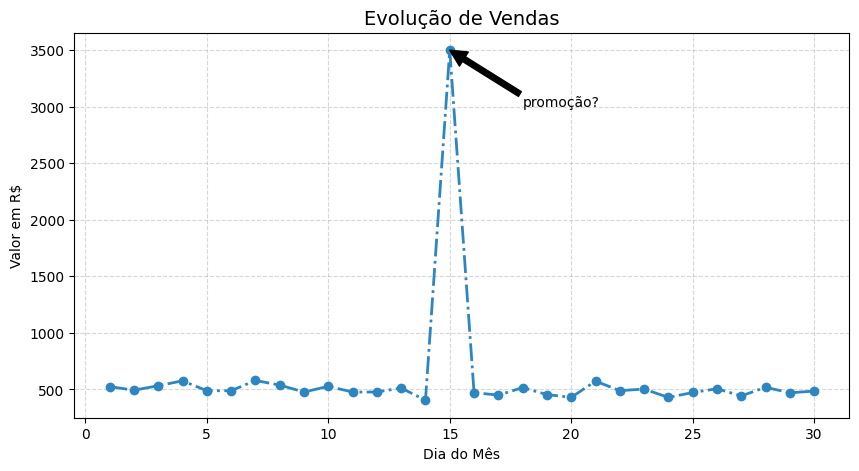

In [13]:
# O Jeito "Profissional" (Orientado a Objetos)
# Criamos a Figura (fig) e os Eixos (ax) separadamente
fig, ax = plt.subplots(figsize=(10, 5))

# Plot de Linha
ax.plot(df_vendas['Dia'], df_vendas['Vendas'], 
        color='#2E86C1',
        linewidth=2,
        marker='o',         # Bolinha em cada ponto
        linestyle='-.'
       )


ax.set_title('Evolução de Vendas', fontsize=14)
ax.set_xlabel('Dia do Mês')
ax.set_ylabel('Valor em R$')
ax.grid(True, linestyle='--', alpha=0.5) # Grade suave

# Adicionando uma anotação 
ax.annotate('promoção?', 
            xy=(15, 3500), 
            xytext=(18, 3000),
            arrowprops=dict(facecolor='black')
            )
plt.show()

In [15]:
meta_errada = df_vendas['Vendas'].mean()
meta_justa = df_vendas['Vendas'].median()

In [17]:
df_vendas['Status'] = np.where(df_vendas['Vendas'] >= meta_justa, 
                               'Acima da Meta', 
                               'Abaixo da Meta'
                               )

df_vendas['Status'].value_counts()


Status
Acima da Meta     15
Abaixo da Meta    15
Name: count, dtype: int64

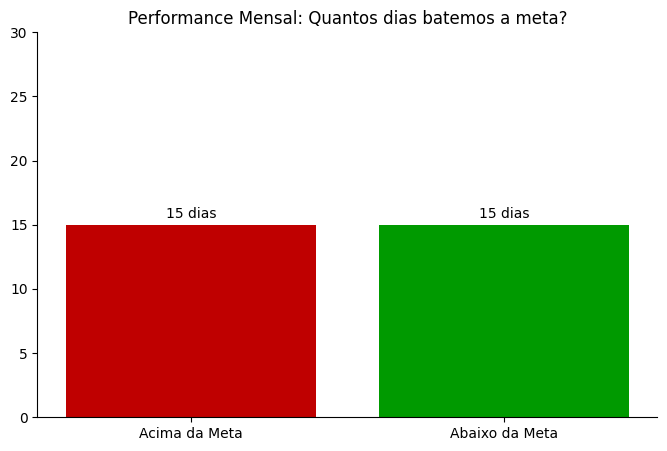

In [18]:
contagem = df_vendas['Status'].value_counts()
fig, ax = plt.subplots(figsize=(8, 5))

barras = ax.bar(
    contagem.index, 
    contagem.values, color=["#BF0000", "#009A00"],)
ax.bar_label(barras, fmt='%d dias', padding=3)
# ax.set_xticklabels(['acima', 'abaixo'])
ax.set_title('Performance Mensal: Quantos dias batemos a meta?')
ax.set_ylim(0, 30) # espaço no comeco do grafico
ax.spines['top'].set_visible(False) # borda
ax.spines['right'].set_visible(False) # borda

plt.show()

## Exercice: "Vocês receberam os dados de Satisfação do Cliente (0 a 10) de 50 atendimentos."

### * Gere um array numpy com 50 notas aleatórias entre 1 e 10 (np.random.randint). (desafio, gerar também 50 nomes)

### * Calcule a Média e a Mediana das notas.

### * Crie um gráfico de Linha mostrando a variação das notas atendimento a atendimento.

### * Adicione uma Linha Horizontal vermelha no gráfico indicando a Média (ax.axhline).

In [36]:
np.random.seed(20000)

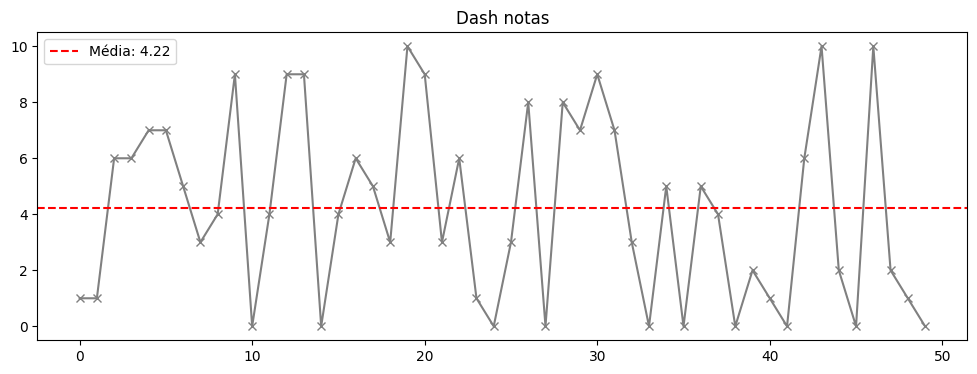

In [47]:
# GABARITO 
notas = np.random.randint(0, 11, 50)
media_notas = notas.mean()

fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(notas, marker='x', color='gray')

ax.axhline(media_notas, color='red', linestyle='--', label=f'Média: {media_notas}')
ax.legend()

ax.set_title('Dash notas')
plt.show()